<a href="https://colab.research.google.com/github/Monisha-18/BrainTumorClassification-DeepLearning/blob/main/BrainTumor(MRI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Dense, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
from warnings import filterwarnings

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
X_train =[]
Y_train =[]
image_size =150
for i in labels :
    # Removed an unnecessary 'Training' in the path
    folderPath = os.path.join('/content/drive/MyDrive/Dataset MRI/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize

100%|██████████| 827/827 [00:21<00:00, 37.89it/s] 


In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
X_train =[]
Y_train =[]
image_size =150
for i in labels :
    folderPath = os.path.join('/content/drive/MyDrive/Dataset MRI/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels :
    folderPath = os.path.join('/content/drive/MyDrive/Dataset MRI/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
X_train = np.array(X_train)
Y_train = np.array(Y_train)

100%|██████████| 74/74 [00:31<00:00,  2.34it/s]


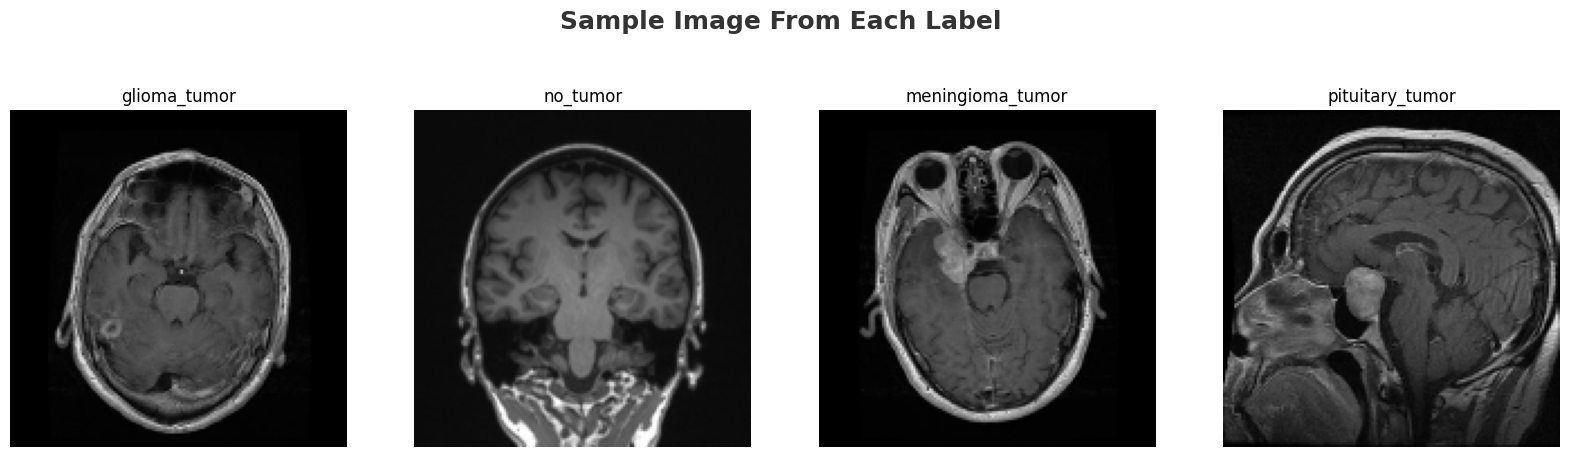

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if Y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(Y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train , Y_train = shuffle(X_train ,Y_train,random_state=101)
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train, test_size=0.1,random_state=101)
X_train.shape
X_test.shape


(327, 150, 150, 3)

In [ ]:
label_encoder = LabelEncoder()
y_train_num = label_encoder.fit_transform(Y_train)
y_test_num = label_encoder.fit_transform(Y_test)
Y_train = tf.keras.utils.to_categorical(y_train_num)
Y_test = tf.keras.utils.to_categorical(y_test_num)

In [ ]:
Y_test


array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
n_samples, height, width, channels = X_train.shape

# Reshape X_train to (n_samples, height * width * channels)
X_train_reshaped = X_train.reshape(n_samples, -1)

smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X_train_reshaped, Y_train)

# reshape X_resampled back to the original dimensions
X_resampled = X_resampled.reshape(-1, height, width, channels)

print(X_resampled.shape)
print(Y_resampled.shape)

(3364, 150, 150, 3)
(3364, 4)


In [ ]:
#  Y_train and Y_resampled are one-hot encoded:
Y_train_labels = np.argmax(Y_train, axis=1)
Y_resampled_labels = np.argmax(Y_resampled, axis=1)

# Count occurrences
train_class_counts = Counter(Y_train_labels)
resampled_class_counts = Counter(Y_resampled_labels)

print("Original training class distribution:", train_class_counts)
print("Resampled class distribution:", resampled_class_counts)

Original training class distribution: Counter({1: 841, 0: 833, 3: 814, 2: 449})
Resampled class distribution: Counter({0: 841, 2: 841, 3: 841, 1: 841})


CNN Model

In [ ]:
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 4
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='linear')
])

# Compile the model
model.compile(optimizer='adam',
              loss='squared_hinge',
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,815,428 (26.00 MB)

 Trainable params: 6,814,468 (26.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=6, verbose=True)

history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=100,validation_split=0.1,
                   callbacks=[ model_rlr])

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 399ms/step - accuracy: 0.4304 - loss: 30.8374 - val_accuracy: 0.9199 - val_loss: 8.7475 - learning_rate: 0.0010
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4933 - loss: 2.1723 - val_accuracy: 0.8961 - val_loss: 2.9462 - learning_rate: 0.0010
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5258 - loss: 0.7371 - val_accuracy: 0.8813 - val_loss: 0.8866 - learning_rate: 0.0010
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5722 - loss: 0.6733 - val_accuracy: 0.8042 - val_loss: 0.9612 - learning_rate: 0.0010
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5943 - loss: 0.5558 - val_accuracy: 0.8220 - val_loss: 0.9705 - learning_rate: 0.0010
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6321 - loss: 0.5219 - val_accuracy: 0.8991 - val_loss: 0.6001 - learning_rate: 0.0010
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6482 - loss: 0.5072

In [ ]:
# Predict the val model
Y_pred = model.predict(X_test)
Y_test_labels = np.argmax(Y_test, axis=1)

# Convert model predictions to class labels
Y_pred_labels = np.argmax(Y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test_labels, Y_pred_labels)
print('Test Accuracy = %.4f' % accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Test Accuracy = 0.8960


In [ ]:
print("Classification Report:\n",classification_report(Y_test_labels, Y_pred_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        93
           1       0.87      0.85      0.86        96
           2       0.87      0.94      0.91        51
           3       0.95      1.00      0.97        87

    accuracy                           0.90       327
   macro avg       0.89      0.90      0.90       327
weighted avg       0.90      0.90      0.89       327



VGG16

In [ ]:
from keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Build the model by passing some dummy data through it.
# This will define the shapes of all layers.
model.build(input_shape=(None, 150, 150, 3)) # Replace None with your batch size if it's fixed

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,911,556 (72.14 MB)

 Trainable params: 4,196,868 (16.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Assuming X_resampled and Y_resampled are your training data
history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=10, validation_split=0.1)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 35s 409ms/step - accuracy: 0.6020 - loss: 11.9725 - val_accuracy: 0.8368 - val_loss: 1.4837
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.8544 - loss: 0.7972 - val_accuracy: 0.9258 - val_loss: 0.7700
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.8822 - loss: 0.3858 - val_accuracy: 0.9436 - val_loss: 0.7476
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.9093 - loss: 0.2656 - val_accuracy: 0.9199 - val_loss: 0.5693
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.9284 - loss: 0.2137 - val_accuracy: 0.9377 - val_loss: 0.7618
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9522 - loss: 0.1613 - val_accuracy: 0.9436 - val_loss: 0.7674
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.9533 - loss: 0.1597 - val_accuracy: 0.9228 - val_loss: 0.7961
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.9569 - loss: 0.1281 - val_accura

In [ ]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


Test Loss: 0.5322433114051819
Test Accuracy: 0.9082568883895874


VGG19

In [ ]:

from keras.applications import VGG19

# Load the pre-trained VGG19 model without the top (fully connected) layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Build the model
model.build(input_shape=(None, 150, 150, 3))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Assuming X_resampled and Y_resampled are your training data
history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,221,252 (92.40 MB)

 Trainable params: 4,196,868 (16.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 254ms/step - accuracy: 0.5589 - loss: 13.3927 - val_accuracy: 0.8427 - val_loss: 0.6060
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.8164 - loss: 0.5211 - val_accuracy: 0.9555 - val_loss: 0.2324
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.8838 - loss: 0.3274 - val_accuracy: 0.9585 - val_loss: 0.2275
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.8896 - loss: 0.2958 - val_accuracy: 0.9466 - val_loss: 0.3306
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9291 - loss: 0.2155 - val_accuracy: 0.9288 - val_loss: 0.3336
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.9127 - loss: 0.2259 - val_accuracy: 0.9555 - val_loss: 0.3344
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.9291 - loss: 0.1888 - val_accuracy: 0.9436 - val_loss: 0.3234
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9404 - loss: 0.1754 - val_accur

ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Build the model
model.build(input_shape=(None, 150, 150, 3))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Assuming X_resampled and Y_resampled are your training data
history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,804,676 (189.99 MB)

 Trainable params: 26,216,964 (100.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 335ms/step - accuracy: 0.5758 - loss: 15.7211 - val_accuracy: 0.8694 - val_loss: 0.6295
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.8224 - loss: 0.4680 - val_accuracy: 0.9377 - val_loss: 0.5638
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8758 - loss: 0.3263 - val_accuracy: 0.9199 - val_loss: 0.5548
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9142 - loss: 0.2244 - val_accuracy: 0.9377 - val_loss: 0.6448
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9176 - loss: 0.1994 - val_accuracy: 0.9169 - val_loss: 0.6472
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9266 - loss: 0.1958 - val_accuracy: 0.9258 - val_loss: 0.6148
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9438 - loss: 0.1342 - val_accuracy: 0.9318 - val_loss: 0.8848
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9533 - loss: 0.1334 - val_accuracy: 0.925

EfficientNet B7

In [ ]:
!pip install -q efficientnet

from efficientnet.tfkeras import EfficientNetB7

# Load the pre-trained EfficientNetB7 model without the top (fully connected) layers
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Build the model
model.build(input_shape=(None, 150, 150, 3))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Assuming X_resampled and Y_resampled are your training data
history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00
258434480/258434480 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnet-b7 (Functional)         │ (None, 5, 5, 2560)          │      64,097,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      32,768,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,868,244 (369.52 MB)

 Trainable params: 32,770,564 (125.01 MB)

 Non-trainable params: 64,097,680 (244.51 MB)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.2344 - loss: 6381.7007 - val_accuracy: 0.5104 - val_loss: 28.1997
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - accuracy: 0.2394 - loss: 4491.6108 - val_accuracy: 0.3234 - val_loss: 6.7149
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - accuracy: 0.2517 - loss: 811.7976 - val_accuracy: 0.1810 - val_loss: 1.4192
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - accuracy: 0.2846 - loss: 25.6420 - val_accuracy: 0.0890 - val_loss: 1.5027
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 243ms/step - accuracy: 0.2709 - loss: 9.6607 - val_accuracy: 0.0623 - val_loss: 1.4585
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.2742 - loss: 9.7851 - val_accuracy: 0.0356 - val_loss: 1.4885
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.2842 - loss: 4.5532 - val_accuracy: 0.0267 - val_loss: 1.5105
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 244ms/step - accuracy: 0.2860 - loss: 4.0190 - 

EfficientNet B0

In [ ]:
!pip install -q efficientnet
from efficientnet.tfkeras import EfficientNetB0

# Load the pre-trained EfficientNetB0 model without the top (fully connected) layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Build the model
model.build(input_shape=(None, 150, 150, 3))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Assuming X_resampled and Y_resampled are your training data
history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnet-b0 (Functional)         │ (None, 5, 5, 1280)          │       4,049,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 32000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      16,384,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,436,128 (77.96 MB)

 Trainable params: 16,386,564 (62.51 MB)

 Non-trainable params: 4,049,564 (15.45 MB)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 52s 498ms/step - accuracy: 0.2657 - loss: 661.4922 - val_accuracy: 0.2700 - val_loss: 4.9348
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.2624 - loss: 29.3926 - val_accuracy: 0.0030 - val_loss: 1.4769
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2890 - loss: 1.6259 - val_accuracy: 0.0059 - val_loss: 1.4867
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.2630 - loss: 2.0388 - val_accuracy: 0.0059 - val_loss: 1.4616
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2821 - loss: 1.4795 - val_accuracy: 0.0000e+00 - val_loss: 1.4928
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.2889 - loss: 1.4821 - val_accuracy: 0.0000e+00 - val_loss: 1.5551
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2796 - loss: 1.4223 - val_accuracy: 0.0000e+00 - val_loss: 1.5372
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.2784 - loss: 1.4282 - val_acc

DenseNet


In [ ]:
from tensorflow.keras.applications import DenseNet121

# Load the pre-trained DenseNet121 model without the top (fully connected) layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Build the model
model.build(input_shape=(None, 150, 150, 3))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Assuming X_resampled and Y_resampled are your training data
history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,428,676 (58.86 MB)

 Trainable params: 8,391,172 (32.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 70s 810ms/step - accuracy: 0.4166 - loss: 25.7813 - val_accuracy: 0.6350 - val_loss: 1.1646
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6365 - loss: 0.9039 - val_accuracy: 0.8843 - val_loss: 1.4658
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6743 - loss: 0.7441 - val_accuracy: 0.8220 - val_loss: 1.0904
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6558 - loss: 0.7861 - val_accuracy: 0.8457 - val_loss: 1.3326
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6786 - loss: 0.7093 - val_accuracy: 0.8605 - val_loss: 1.1417
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7025 - loss: 0.6818 - val_accuracy: 0.7033 - val_loss: 1.1993
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6878 - loss: 0.6614 - val_accuracy: 0.8724 - val_loss: 1.0514
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7183 - loss: 0.6231 - val_accuracy: 0.8932 

Inception

In [ ]:
from tensorflow.keras.applications import InceptionV3

# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Build the model
model.build(input_shape=(None, 150, 150, 3))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Assuming X_resampled and Y_resampled are your training data
history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 3, 3, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,242,532 (119.18 MB)

 Trainable params: 9,439,748 (36.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 465ms/step - accuracy: 0.3874 - loss: 218.4986 - val_accuracy: 0.5015 - val_loss: 1.0682
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.3749 - loss: 1.3917 - val_accuracy: 0.3650 - val_loss: 1.1851
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4112 - loss: 1.2386 - val_accuracy: 0.1691 - val_loss: 1.2882
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.4419 - loss: 1.0952 - val_accuracy: 0.2908 - val_loss: 1.5335
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4549 - loss: 1.0962 - val_accuracy: 0.2878 - val_loss: 1.2590
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5019 - loss: 1.0188 - val_accuracy: 0.4214 - val_loss: 1.2605
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4989 - loss: 0.9832 - val_accuracy: 0.7685 - val_loss: 1.2828
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5588 - loss: 0.9545 - val_accuracy: 0.854

MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes for your problem
])

# Build the model
model.build(input_shape=(None, 150, 150, 3))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Assuming X_resampled and Y_resampled are your training data
history = model.fit(X_resampled, Y_resampled, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


<ipython-input-26-9a69ad2430a4>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 32000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │      16,384,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,644,548 (71.12 MB)

 Trainable params: 16,386,564 (62.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.4980 - loss: 10.7935 - val_accuracy: 0.7923 - val_loss: 0.7229
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7225 - loss: 0.6844 - val_accuracy: 0.8813 - val_loss: 0.4932
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7855 - loss: 0.5341 - val_accuracy: 0.9080 - val_loss: 0.4266
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8221 - loss: 0.4516 - val_accuracy: 0.9228 - val_loss: 0.4803
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8285 - loss: 0.4316 - val_accuracy: 0.8724 - val_loss: 0.5518
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8531 - loss: 0.3839 - val_accuracy: 0.9377 - val_loss: 0.4797
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8657 - loss: 0.3203 - val_accuracy: 0.9199 - val_loss: 0.5005
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8675 - loss: 0.3256 - val_accuracy: 0.8843 